## Modelo KNN TARRAGONA

## PROBLEMA 
Por el aumento del tráfico de transporte de Mercancías por vía marítima. Se realiza la Predicción para los siguientes meses del flujo de Mercancías total para las principales Autoridades Porturarias españolas.




## LIBRERÍAS


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## DATOS

In [2]:
trafico = pd.read_csv('trafic.csv')
display(trafico.head())
display(trafico.shape)

,Unnamed: 0,Autoridad_Portuaria,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,fecha,Total_buques,Total_automoviles,Total_toneladas
0,0,1,623294,464559,79616,0,92330,0,0.0,4722,2022,1,2022-01-01,94,0,1259799
1,1,2,0,119575,104040,97163,4663,59,14934.0,11874,2022,1,2022-01-01,44,2257,325500
2,2,3,7512,266992,134447,35899,141,71601,2129.5,13819,2022,1,2022-01-01,3115,3566,516592
3,3,4,74703,189219,97892,0,3025,0,0.0,0,2022,1,2022-01-01,65,0,364839
4,4,5,2268541,207212,6062831,4742267,5304368,1304479,396644.0,112032,2022,1,2022-01-01,42993,17298,19889698


(784, 16)

In [3]:
# Eliminación de variables innecesarias 
trafico = trafico.drop('Unnamed: 0', axis=1)

In [4]:
trafico.dtypes

Autoridad_Portuaria                   int64
Graneles Líquidos t                   int64
Graneles Sólidos t                    int64
Mercancía General t                   int64
Mercancia General Contenedores t      int64
Mercancías En Tránsito t              int64
Tráfico Ro-Ro t                       int64
TEUS Contenedores                   float64
Total_pasajeros                       int64
Anios                                 int64
Mes                                   int64
fecha                                object
Total_buques                          int64
Total_automoviles                     int64
Total_toneladas                       int64
dtype: object

In [5]:
trafico['fecha'] = pd.to_datetime(trafico['fecha'])
trafico.head()

,Autoridad_Portuaria,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,fecha,Total_buques,Total_automoviles,Total_toneladas
0,1,623294,464559,79616,0,92330,0,0.0,4722,2022,1,2022-01-01,94,0,1259799
1,2,0,119575,104040,97163,4663,59,14934.0,11874,2022,1,2022-01-01,44,2257,325500
2,3,7512,266992,134447,35899,141,71601,2129.5,13819,2022,1,2022-01-01,3115,3566,516592
3,4,74703,189219,97892,0,3025,0,0.0,0,2022,1,2022-01-01,65,0,364839
4,5,2268541,207212,6062831,4742267,5304368,1304479,396644.0,112032,2022,1,2022-01-01,42993,17298,19889698


In [6]:
trafico.dtypes

Autoridad_Portuaria                          int64
Graneles Líquidos t                          int64
Graneles Sólidos t                           int64
Mercancía General t                          int64
Mercancia General Contenedores t             int64
Mercancías En Tránsito t                     int64
Tráfico Ro-Ro t                              int64
TEUS Contenedores                          float64
Total_pasajeros                              int64
Anios                                        int64
Mes                                          int64
fecha                               datetime64[ns]
Total_buques                                 int64
Total_automoviles                            int64
Total_toneladas                              int64
dtype: object

## Tarragona

In [7]:
df_tarragona = trafico[trafico['Autoridad_Portuaria'] == 25]
df_tarragona.head()

,Autoridad_Portuaria,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,fecha,Total_buques,Total_automoviles,Total_toneladas
24,25,1857969,955440,198401,49423,217873,42022,5292.75,54,2022,1,2022-01-01,1425,13311,3321128
52,25,1627078,661501,155616,50652,51559,49146,5466.00,41,2022,2,2022-02-01,1371,15980,2595552
80,25,1303749,304744,316767,160194,188682,58433,14058.00,65,2022,3,2022-03-01,1721,14836,2332569
108,25,1706459,984534,262411,135858,583096,52787,12230.50,952,2022,4,2022-04-01,1657,14988,3725145
136,25,1602562,799895,293274,109539,347730,46016,11553.00,5848,2022,5,2022-05-01,1244,15570,3199016


In [8]:
df_tarragona = df_tarragona.drop('Autoridad_Portuaria', axis=1)

In [9]:
datos_tarragona = df_tarragona[['Total_toneladas']]

In [10]:
datos_tarragona.to_excel('autoridades/tarragona.xlsx')

In [10]:
df_tarragona.dtypes

Graneles Líquidos t                          int64
Graneles Sólidos t                           int64
Mercancía General t                          int64
Mercancia General Contenedores t             int64
Mercancías En Tránsito t                     int64
Tráfico Ro-Ro t                              int64
TEUS Contenedores                          float64
Total_pasajeros                              int64
Anios                                        int64
Mes                                          int64
fecha                               datetime64[ns]
Total_buques                                 int64
Total_automoviles                            int64
Total_toneladas                              int64
dtype: object

In [11]:
df_tarragona.describe()

,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,fecha,Total_buques,Total_automoviles,Total_toneladas
count,2.800000e+01,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28,28.000000,28.000000,2.800000e+01
mean,1.611931e+06,8.095472e+05,167368.642857,38986.928571,164369.464286,35172.107143,4334.125000,6781.357143,2022.714286,5.928571,2023-02-14 22:17:08.571428608,651.107143,16959.428571,2.827376e+06
min,6.623370e+05,3.047440e+05,72026.000000,5933.000000,6188.000000,18634.000000,544.000000,0.000000,2022.000000,1.000000,2022-01-01 00:00:00,161.000000,11765.000000,2.332569e+06
25%,1.529228e+06,7.053025e+05,137115.750000,15766.250000,63888.000000,24886.000000,1883.750000,33.750000,2022.000000,3.000000,2022-07-24 06:00:00,203.500000,13764.000000,2.515109e+06
50%,1.667100e+06,8.127595e+05,155779.000000,29983.000000,119226.500000,34523.000000,3919.500000,2165.000000,2023.000000,5.500000,2023-02-15 00:00:00,219.000000,15741.500000,2.794508e+06
75%,1.741083e+06,9.513952e+05,176888.500000,42183.500000,201947.500000,42887.000000,5460.937500,13475.000000,2023.000000,9.000000,2023-09-08 12:00:00,1259.750000,18401.000000,3.076614e+06
max,1.943876e+06,1.194351e+06,316767.000000,160194.000000,583096.000000,59847.000000,14058.000000,24338.000000,2024.000000,12.000000,2024-04-01 00:00:00,1721.000000,27293.000000,3.725145e+06
std,2.535891e+05,2.079044e+05,54428.919828,37149.134929,141883.845644,11702.139897,3401.310787,7999.181658,0.712697,3.579040,NaN,585.795840,4462.352597,3.938336e+05


In [12]:
df_tarragona.tail()

,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,fecha,Total_buques,Total_automoviles,Total_toneladas
668,1615477,570518,138303,16610,44481,30227,2049.0,0,2023,12,2023-12-01,193,18156,2415616
696,1938824,996005,145092,10248,34705,37469,1068.0,0,2024,1,2024-01-01,202,27293,3162343
724,1455820,738658,72026,5933,54717,18634,544.0,0,2024,2,2024-02-01,161,11893,2345788
752,1756877,907180,171587,12484,125482,37597,1240.0,0,2024,3,2024-03-01,193,24962,3011207
780,1747029,531797,167157,11144,65798,25348,1039.0,11164,2024,4,2024-04-01,204,17204,2548273


In [13]:
df_tarragona =df_tarragona.set_index('fecha')

In [14]:
df_tarragona.head()

,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,Total_buques,Total_automoviles,Total_toneladas
fecha,,,,,,,,,,,,,
2022-01-01,1857969,955440,198401,49423,217873,42022,5292.75,54,2022,1,1425,13311,3321128
2022-02-01,1627078,661501,155616,50652,51559,49146,5466.00,41,2022,2,1371,15980,2595552
2022-03-01,1303749,304744,316767,160194,188682,58433,14058.00,65,2022,3,1721,14836,2332569
2022-04-01,1706459,984534,262411,135858,583096,52787,12230.50,952,2022,4,1657,14988,3725145
2022-05-01,1602562,799895,293274,109539,347730,46016,11553.00,5848,2022,5,1244,15570,3199016


## Selección de Variables Tarragona

Utilización de la Correlación entre cada una de las características y la variable a predecir.

In [15]:
corr_matriz_tarragona =df_tarragona.corr(method='pearson')
corr_matriz_tarragona

,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,Total_buques,Total_automoviles,Total_toneladas
Graneles Líquidos t,1.000000,0.054315,-0.024645,-0.214988,-0.216760,-0.270247,-0.238021,-0.193094,0.435726,-0.278690,-0.338226,0.299230,0.562766
Graneles Sólidos t,0.054315,1.000000,-0.195175,-0.199966,0.424512,-0.035927,-0.176684,0.058215,0.079414,-0.126133,-0.129854,0.227144,0.668905
Mercancía General t,-0.024645,-0.195175,1.000000,0.873777,0.537912,0.742564,0.878866,-0.210650,-0.468827,-0.231358,0.690780,-0.022734,0.317576
Mercancia General Contenedores t,-0.214988,-0.199966,0.873777,1.000000,0.616781,0.718062,0.980890,-0.284437,-0.592999,-0.218810,0.743056,-0.175197,0.214633
Mercancías En Tránsito t,-0.216760,0.424512,0.537912,0.616781,1.000000,0.569390,0.660434,-0.247530,-0.542729,-0.087774,0.600939,-0.145035,0.594230
Tráfico Ro-Ro t,-0.270247,-0.035927,0.742564,0.718062,0.569390,1.000000,0.732124,-0.291173,-0.583311,-0.231663,0.865620,0.072959,0.212224
TEUS Contenedores,-0.238021,-0.176684,0.878866,0.980890,0.660434,0.732124,1.000000,-0.285853,-0.684006,-0.178399,0.774692,-0.193896,0.227137
Total_pasajeros,-0.193094,0.058215,-0.210650,-0.284437,-0.247530,-0.291173,-0.285853,1.000000,0.008399,0.462560,-0.175470,-0.239103,-0.247372
Anios,0.435726,0.079414,-0.468827,-0.592999,-0.542729,-0.583311,-0.684006,0.008399,1.000000,-0.298696,-0.786805,0.492457,-0.011101
Mes,-0.278690,-0.126133,-0.231358,-0.218810,-0.087774,-0.231663,-0.178399,0.462560,-0.298696,1.000000,-0.108780,-0.354440,-0.337153


# Matriz de Correlaciones


Text(0.5, 1.0, 'Matriz de Correlación Tarragona')

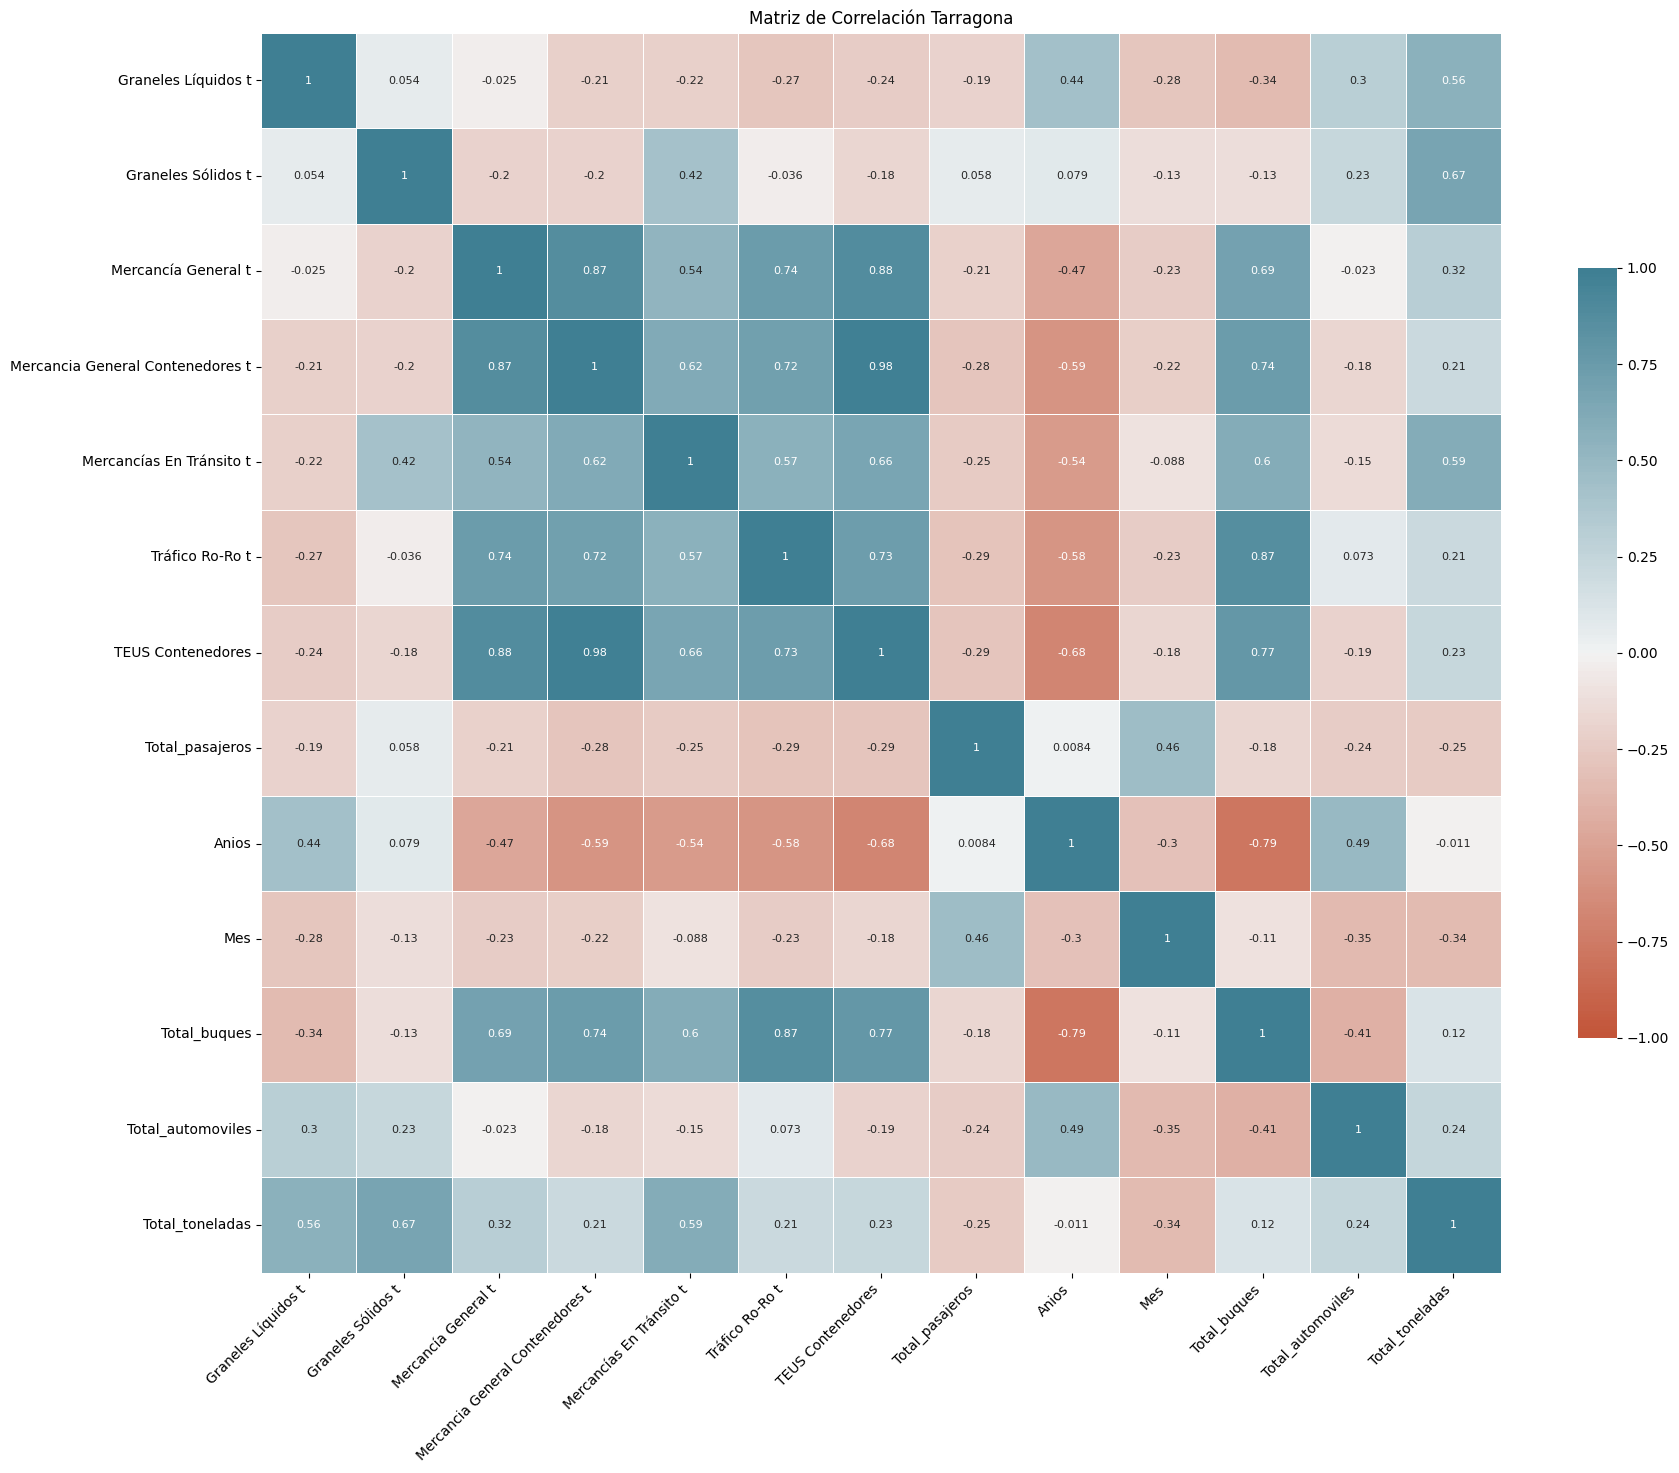

In [16]:
# Heatmap Matriz de Correlaciones 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(
    data = corr_matriz_tarragona,
    annot= True,
    cbar= True,
    annot_kws={"size":8},
    vmin= -1,
    vmax=1,
    center=0,
    cmap = sns.diverging_palette(20, 220, n=200),
    square= True,
    ax= ax,
    linewidths=.5,
    cbar_kws={"shrink":.5}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize=10)
plt.title('Matriz de Correlación Tarragona')

Elección de variables con una correlación mayor del 60%

- Graneles Sólidos t




- Total_toneladas

In [17]:
# Selección
from sklearn.model_selection import train_test_split

df = df_tarragona[['Graneles Sólidos t', 'Total_toneladas']]

train, test = train_test_split(df, test_size=0.30, shuffle=False)

In [18]:
# Reseteamos el index con el fin de evitar problemas en la validación cruzada

train.reset_index(drop=True, inplace= True)
train.head()

,Graneles Sólidos t,Total_toneladas
0,955440,3321128
1,661501,2595552
2,304744,2332569
3,984534,3725145
4,799895,3199016


# 1. Parametrización

Elección: KNeighbors, k y Pesos se van a parametrizar para ello se ejecutará [validación cruzada] t como medida de éxito [MAE]

Min Value uniform : 276719.95208333334 (8)
Min Value distance : 300968.270258368 (8)


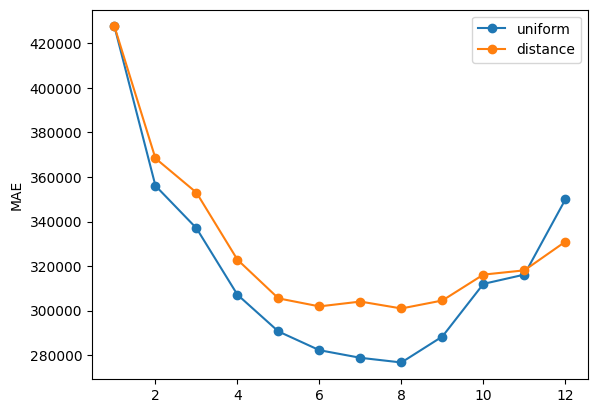

In [19]:
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits =5, shuffle = False) #
# se podría utilizar https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,13):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)

       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train):
          # División train test aleatoria
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['Total_toneladas'], axis=1), 
                               y = f_train['Total_toneladas'])
          y_pred = knn.predict(X = f_test.drop(['Total_toneladas'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['Total_toneladas'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

# 2. Construcción y ejecución del modelo



In [20]:
# Constructor Mejor constructor
n_neighbors = 8
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)

# fit and predict
knn.fit(X= train.drop(['Total_toneladas'], axis=1), y= train['Total_toneladas'])
y_pred = knn.predict(X=test.drop(['Total_toneladas'], axis=1))
mae = mean_absolute_error(test['Total_toneladas'], y_pred)

print('MAE:', mae)

MAE: 126093.81944444444


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
mse_knn = mean_squared_error(test['Total_toneladas'], y_pred)
rmse_knn = np.sqrt(mse_knn)
r2_knn= r2_score(test['Total_toneladas'], y_pred)

In [23]:
print(f"KNN - MAE: {mae}, MSE: {mse_knn}, RMSE: {rmse_knn}, R2: {r2_knn}")

KNN - MAE: 126093.81944444444, MSE: 25909045841.310764, RMSE: 160962.8710023239, R2: 0.6896511410835338


In [27]:
# Constructor
n_neighbors = 9
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)

# fit and predict
knn.fit(X= train.drop(['Total_toneladas'], axis=1), y= train['Total_toneladas'])
y_pred = knn.predict(X=test.drop(['Total_toneladas'], axis=1))
mae = mean_absolute_error(test['Total_toneladas'], y_pred)

print('MAE:', mae)

MAE: 133555.76543209876


In [26]:
# Constructor  
n_neighbors = 7
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)

# fit and predict
knn.fit(X= train.drop(['Total_toneladas'], axis=1), y= train['Total_toneladas'])
y_pred = knn.predict(X=test.drop(['Total_toneladas'], axis=1))
mae = mean_absolute_error(test['Total_toneladas'], y_pred)

print('MAE:', mae)

MAE: 132892.92063492065


In [29]:
# Redondear el resultado
res = np.rint(y_pred)
res = res.astype(int)
output = pd.DataFrame({'date':test.index, 'result':res})



In [30]:
res = res.tolist()

In [31]:
res

[2674340,
 2802638,
 3119778,
 2802638,
 2616798,
 3224301,
 2702484,
 3081929,
 2508492]

In [32]:
test['Total_toneladas'].tolist()

[2595445,
 2712374,
 3082685,
 3000891,
 2415616,
 3162343,
 2345788,
 3011207,
 2548273]

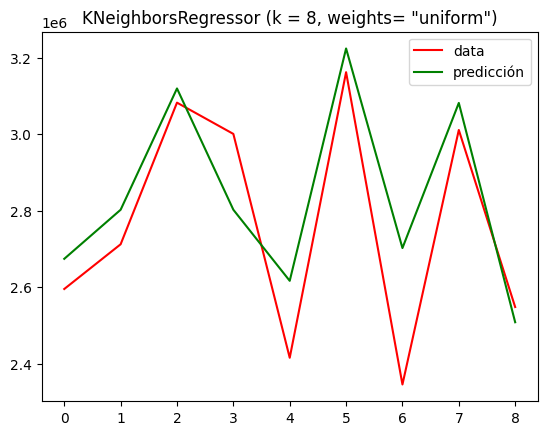

In [33]:
from sklearn.metrics import mean_absolute_error

xx = np.arange(test['Total_toneladas'].shape[0])
plt.plot(xx, test['Total_toneladas'], c='r', label = 'data')
plt.plot(xx, y_pred, c='g', label= 'predicción')
plt.axis('tight')
plt.legend()
plt.title('KNeighborsRegressor (k = %i, weights= "%s")' % (n_neighbors, weights))

plt.show()
          

C:\Users\Encarni\AppData\Local\Temp\ipykernel_18500\4104422436.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  next_month_prediction = knn.predict(X=last_6_months.drop(['Total_toneladas'], axis=1).fillna(method='ffill'))
C:\Users\Encarni\AppData\Local\Temp\ipykernel_18500\4104422436.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_predictions = pd.concat([future_predictions, pd.DataFrame({'Total_toneladas': [next_month_prediction[0]]})], ignore_index=True)
C:\Users\Encarni\AppData\Local\Temp\ipykernel_18500\4104422436.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill()

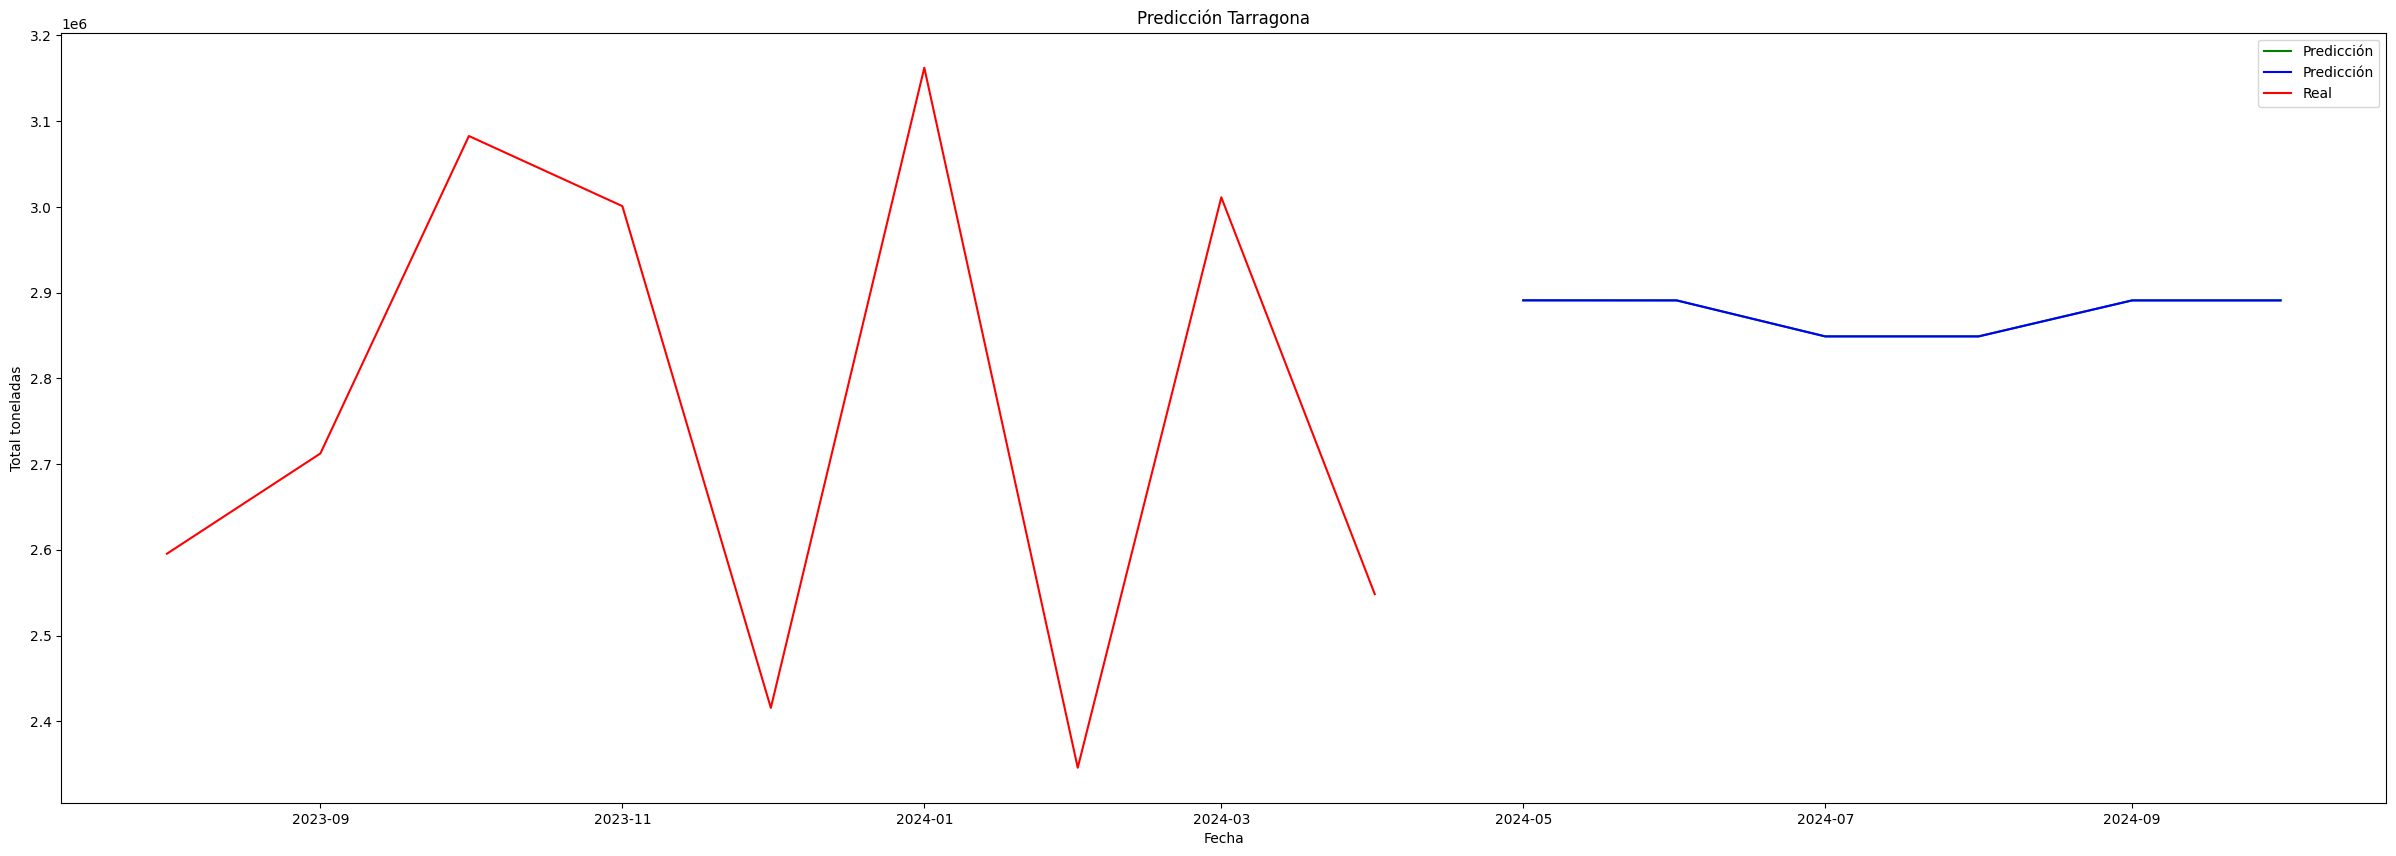

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
# Predecir los siguientes 6 meses


# Obtiene los últimos 6 meses de datos de entrenamiento
train_last_6_months = train.tail(10)

# Ajusta el modelo KNN utilizando los últimos 6 meses de datos de entrenamiento
knn.fit(X=train_last_6_months.drop(['Total_toneladas'], axis=1), y=train_last_6_months['Total_toneladas'])

# Crea un DataFrame vacío para almacenar las predicciones
future_predictions = pd.DataFrame(columns=['Total_toneladas'])

# Bucle para predecir los siguientes 6 meses
for i in range(6):
  # Obtiene las últimas 6 filas de datos (incluidas las predicciones)
  last_6_months = pd.concat([train_last_6_months, future_predictions])[-6:]

  # Realiza la predicción para el siguiente mes
  next_month_prediction = knn.predict(X=last_6_months.drop(['Total_toneladas'], axis=1).fillna(method='ffill'))

  # Agrega la predicción al DataFrame, convirtiendo la predicción a un DataFrame antes de concatenar
  future_predictions = pd.concat([future_predictions, pd.DataFrame({'Total_toneladas': [next_month_prediction[0]]})], ignore_index=True)

# Crea un rango de fechas para los siguientes 6 meses
future_dates = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')

# Crea un DataFrame con las fechas y las predicciones
future_df = pd.DataFrame({'date': future_dates, 'result': future_predictions['Total_toneladas']})

# Concatena los datos de prueba y las predicciones futuras
combined_df = pd.concat([test, future_df])

# Gráfica de las predicciones
fig, ax = plt.subplots(figsize=(30, 10))
# Assuming 'future_data' contains data for the next 6 months
future_dates = pd.to_datetime(['2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01'])

# Assuming 'future_predictions' contains the predictions for those months
plt.plot(future_dates, future_predictions, c='g', label='Predicción')
plt.plot(combined_df['date'], combined_df['result'], c='b', label='Predicción')

plt.plot(test.index, test['Total_toneladas'], c='r', label='Real')
plt.xlabel('Fecha')
plt.ylabel('Total toneladas')
plt.title('Predicción Tarragona')
plt.legend()
plt.show()

In [35]:
combined_df

,Graneles Sólidos t,Total_toneladas,date,result
2023-08-01 00:00:00,719903.0,2595445.0,NaT,NaN
2023-09-01 00:00:00,843462.0,2712374.0,NaT,NaN
2023-10-01 00:00:00,950047.0,3082685.0,NaT,NaN
2023-11-01 00:00:00,814225.0,3000891.0,NaT,NaN
2023-12-01 00:00:00,570518.0,2415616.0,NaT,NaN
2024-01-01 00:00:00,996005.0,3162343.0,NaT,NaN
2024-02-01 00:00:00,738658.0,2345788.0,NaT,NaN
2024-03-01 00:00:00,907180.0,3011207.0,NaT,NaN
2024-04-01 00:00:00,531797.0,2548273.0,NaT,NaN
0,NaN,NaN,2024-05-01,2891001.750
